In [1]:
import numpy as np
import pandas as pd

class Perceptron(object):
    #eta is the learning rate. 
    #n_iter is the number of passes over the training data set. 
    #w_ 1d-array of weights after fitting. 
    #errors_ number of misclassifications in each epoch. (stored as a list)
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        #X is a matrix of n_samples by n_features
        #y is a list of n_samples length of targets AKA LABELS. 
        self.w_ = np.zeros(1 + X.shape[1]) #initial weights of length 1 greater than the number of features. weights are 0 init.
        self.errors_ = []
        for _ in range(self.n_iter):
            #each pass over the data set X
            errors = 0
            for xi, target in zip(X, y): #zip function is MLG
                update = self.eta * (target - self.predict(xi)) 
                self.w_[1:] += update * xi #this bit is because we differentiate between updating the weight and the bias.
                self.w_[0] += update #updating the bias is not dependent on any given weight value. 
                errors += int(update != 0.0) #if we predicted wrong add 1 to the error count
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] #we have w0 as a bias so we take w1 --- wn and just add w0 at the end
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) #vectorized where

In [11]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [12]:
#we will use Setosa as  -1 , Versicolor as 1 
#first extract first 100 rows that correspond to 50 setosas and 50 versicolors. 

In [13]:
import matplotlib.pyplot as plt

In [23]:
y = df.iloc[0:100, 4].values
#y is our 100 labels as strings. 
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [25]:
lables = []
for yi in y:
    if yi == 'Iris-versicolor':
        lables.append(1)
    else:
        lables.append(-1)

In [27]:
lables = np.array(lables)

In [28]:
X = df.iloc[0:100, [0, 2]].values #take data of only 2 features and split into feature matrix

Text(0,0.5,'sepal length')

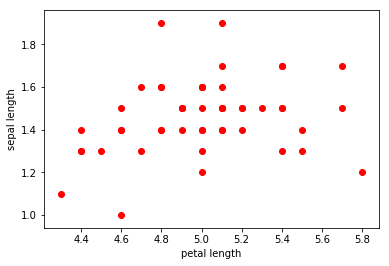

In [33]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label = 'Setosa')
plt.xlabel('petal length')
plt.ylabel('sepal length')

Text(0,0.5,'sepal length')

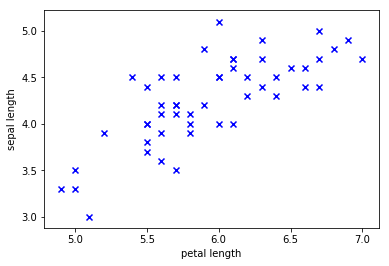

In [32]:
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label = 'Versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')

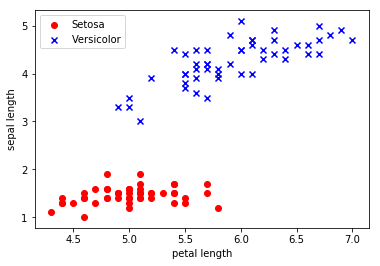

In [34]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label = 'Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label = 'Versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [35]:
myPerceptron = Perceptron(eta=0.1, n_iter=10)

In [36]:
myPerceptron.fit(X, lables)

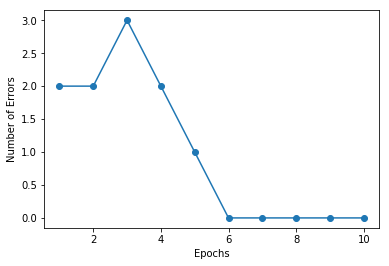

In [37]:
plt.plot(range(1, len(myPerceptron.errors_) + 1), myPerceptron.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Errors')
plt.show()

In [38]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    